This notebook will reproduce Figure 5(a)(b)(c).

In [1]:
import numpy as np
from multiprocessing import Pool
import os
import sys
from matplotlib import pyplot as plt
from train_add import train_add
from produce_figure_data import HiddenPrints, eta_reprs, eta_decs, wds, path5a, path5b, path5c

Figure 5 (a): sweep decoder learning rate and representation learning rate. Using 8 CPUs will take about 30 minutes, for default setup 10*10 models (Here the default steps=1e4, in paper we report results for steps=1e5). You can increase/decrease training steps or sweeping steps.

In [45]:
train_iterss = []
test_iterss = []
for eta_repr in eta_reprs:
    trains = []
    tests = []
    for eta_dec in eta_decs:
        train = np.loadtxt(path5a+"trainstep_eta1_%.5f_eta2_%.5f.txt"%(eta_repr, eta_dec))
        test = np.loadtxt(path5a+"teststep_eta1_%.5f_eta2_%.5f.txt"%(eta_repr, eta_dec))
        trains.append(train)
        tests.append(test)
    train_iterss.append(trains)
    test_iterss.append(tests)
    
train_iterss = np.array(train_iterss)
test_iterss = np.array(test_iterss)

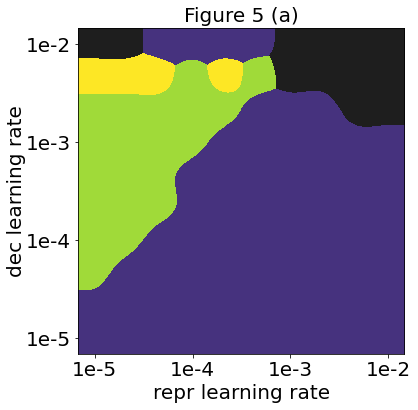

In [46]:

plt.figure(figsize=(6,6))
fontsize = 20

palette = np.array([[160, 218, 57],   # green, compression
                    [253, 231, 37],   # yellow, grokking
                    [70, 50, 126],   # blue, memorization
                    [30,30,30]])  # black, confusion
id_mat = np.eye(4,)
shp = trainss.shape #??


steps = int(1e4)
threshold = 2e3 # G = test_iterss - test_iterss; G > thereshold: grokking; G < threhold: generalization.
I = np.transpose((train_iterss < (steps-1))*(test_iterss < (steps-1))*((test_iterss-train_iterss)<threshold))*0 +np.transpose((train_iterss < (steps-1))*(test_iterss < (steps-1))*((test_iterss-train_iterss)>threshold))*1+np.transpose((train_iterss < (steps-1))*(test_iterss == (steps-1)))*2+np.transpose((train_iterss == (steps-1))*(test_iterss == (steps-1)))*3

RGB = id_mat[I]

import torch
scale = 100
RGBt = np.transpose(RGB, (2,0,1))
RGBt = torch.nn.functional.interpolate(torch.tensor(np.array([RGBt]).astype(np.float64)), scale_factor=scale, mode="bicubic")
RGBt = np.transpose(RGBt[0], (1,2,0)).detach().numpy()

I = np.argmin(np.mean((RGBt.reshape(shp[0]*shp[1]*scale**2,4)[np.newaxis,:]-id_mat[:,np.newaxis,:])**2, axis=2), axis=0).reshape(shp[0]*scale, shp[1]*scale)
RGB = palette[I]

plt.xlabel("repr learning rate",fontsize=fontsize)
plt.ylabel("dec learning rate",fontsize=fontsize, labelpad=0)
#plt.yticks([0+int(0.5*scale),int(3.5*scale),int(6.5*scale),int(9.5*scale)],[wds[0], wds[3], wds[6], wds[9]],fontsize=25)
plt.xticks([0+int(0.5*scale),int(3.5*scale),int(6.5*scale),int(9.5*scale)], ["1e-5", "1e-4", "1e-3", "1e-2"],fontsize=fontsize)
plt.yticks([0+int(0.5*scale),int(3.5*scale),int(6.5*scale),int(9.5*scale)], ["1e-2", "1e-3", "1e-4", "1e-5"],fontsize=fontsize)

plt.title("Figure 5 (a)", fontsize=fontsize)

plt.imshow(RGB, interpolation="nearest", alpha=1.0)
plt.show()

In [47]:
train_iterss = []
test_iterss = []
for wd in wds:
    trains = []
    tests = []
    for eta_dec in eta_decs:
        train = np.loadtxt(path5b+"trainstep_eta_%.5f_wd_%.5f.txt"%(eta_dec, wd))
        test = np.loadtxt(path5b+"teststep_eta_%.5f_wd_%.5f.txt"%(eta_dec, wd))
        trains.append(train)
        tests.append(test)
    train_iterss.append(trains)
    test_iterss.append(tests)
    
train_iterss = np.array(train_iterss)
test_iterss = np.array(test_iterss)

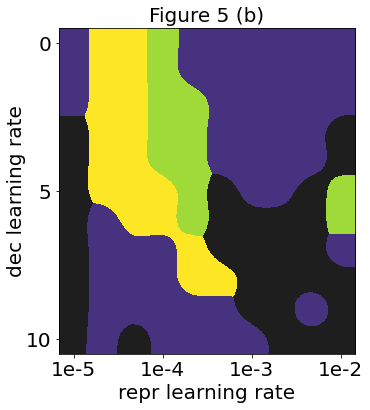

In [48]:
plt.figure(figsize=(6,6))
fontsize = 20

palette = np.array([[160, 218, 57],   # green, compression
                    [253, 231, 37],   # yellow, grokking
                    [70, 50, 126],   # blue, memorization
                    [30,30,30]])  # black, confusion
id_mat = np.eye(4,)
shp = train_iterss.shape


steps = 1e4
threshold = 1e3 # G = test_iterss - test_iterss; G > thereshold: grokking; G < threhold: generalization.
I = np.transpose((train_iterss < (steps-1))*(test_iterss < (steps-1))*((test_iterss-train_iterss)<threshold))*0 +np.transpose((train_iterss < (steps-1))*(test_iterss < (steps-1))*((test_iterss-train_iterss)>threshold))*1+np.transpose((train_iterss < (steps-1))*(test_iterss == (steps-1)))*2+np.transpose((train_iterss == (steps-1))*(test_iterss == (steps-1)))*3

RGB = id_mat[I]

import torch
scale = 100
RGBt = np.transpose(RGB, (2,0,1))
RGBt = torch.nn.functional.interpolate(torch.tensor(np.array([RGBt]).astype(np.float64)), scale_factor=scale, mode="bicubic")
RGBt = np.transpose(RGBt[0], (1,2,0)).detach().numpy()

I = np.transpose(np.argmin(np.mean((RGBt.reshape(shp[0]*shp[1]*scale**2,4)[np.newaxis,:]-id_mat[:,np.newaxis,:])**2, axis=2), axis=0).reshape(shp[1]*scale, shp[0]*scale))
RGB = palette[I]

plt.xlabel("repr learning rate",fontsize=fontsize)
plt.ylabel("dec learning rate",fontsize=fontsize, labelpad=0)
#plt.yticks([0+int(0.5*scale),int(3.5*scale),int(6.5*scale),int(9.5*scale)],[wds[0], wds[3], wds[6], wds[9]],fontsize=25)
plt.xticks([0+int(0.5*scale),int(3.5*scale),int(6.5*scale),int(9.5*scale)], ["1e-5", "1e-4", "1e-3", "1e-2"],fontsize=fontsize)
plt.yticks([0+int(0.5*scale),int(5.5*scale),int(10.5*scale)], ["0", "5", "10"],fontsize=fontsize)

plt.title("Figure 5 (b)", fontsize=fontsize)

plt.imshow(RGB, interpolation="nearest", alpha=1.0)

In [3]:

train_iterss = []
test_iterss = []
for wd in wds:
    trains = []
    tests = []
    for eta_dec in eta_decs:
        train = np.loadtxt(path5c+"trainstep_eta_%.5f_wd_%.5f.txt"%(eta_dec, wd))
        test = np.loadtxt(path5c+"teststep_eta_%.5f_wd_%.5f.txt"%(eta_dec, wd))
        trains.append(train)
        tests.append(test)
    train_iterss.append(trains)
    test_iterss.append(tests)
    
train_iterss = np.array(train_iterss)
test_iterss = np.array(test_iterss)

/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


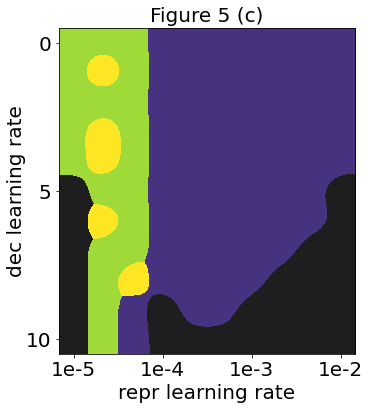

In [4]:
plt.figure(figsize=(6,6))
fontsize = 20

palette = np.array([[160, 218, 57],   # green, compression
                    [253, 231, 37],   # yellow, grokking
                    [70, 50, 126],   # blue, memorization
                    [30,30,30]])  # black, confusion
id_mat = np.eye(4,)
shp = train_iterss.shape


steps = 1e4
threshold = 1e3 # G = test_iterss - test_iterss; G > thereshold: grokking; G < threhold: generalization.
I = np.transpose((train_iterss < (steps-1))*(test_iterss < (steps-1))*((test_iterss-train_iterss)<threshold))*0 +np.transpose((train_iterss < (steps-1))*(test_iterss < (steps-1))*((test_iterss-train_iterss)>threshold))*1+np.transpose((train_iterss < (steps-1))*(test_iterss == (steps-1)))*2+np.transpose((train_iterss == (steps-1))*(test_iterss == (steps-1)))*3

RGB = id_mat[I]

import torch
scale = 100
RGBt = np.transpose(RGB, (2,0,1))
RGBt = torch.nn.functional.interpolate(torch.tensor(np.array([RGBt]).astype(np.float64)), scale_factor=scale, mode="bicubic")
RGBt = np.transpose(RGBt[0], (1,2,0)).detach().numpy()

I = np.transpose(np.argmin(np.mean((RGBt.reshape(shp[0]*shp[1]*scale**2,4)[np.newaxis,:]-id_mat[:,np.newaxis,:])**2, axis=2), axis=0).reshape(shp[1]*scale, shp[0]*scale))
RGB = palette[I]

plt.xlabel("repr learning rate",fontsize=fontsize)
plt.ylabel("dec learning rate",fontsize=fontsize, labelpad=0)
#plt.yticks([0+int(0.5*scale),int(3.5*scale),int(6.5*scale),int(9.5*scale)],[wds[0], wds[3], wds[6], wds[9]],fontsize=25)
plt.xticks([0+int(0.5*scale),int(3.5*scale),int(6.5*scale),int(9.5*scale)], ["1e-5", "1e-4", "1e-3", "1e-2"],fontsize=fontsize)
plt.yticks([0+int(0.5*scale),int(5.5*scale),int(10.5*scale)], ["0", "5", "10"],fontsize=fontsize)

plt.title("Figure 5 (c)", fontsize=fontsize)

plt.imshow(RGB, interpolation="nearest", alpha=1.0)